In [1]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
#from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

Loading the data

In [2]:
city_attr = pd.read_csv('city_attributes.csv')
desc = pd.read_csv('Weather Description.csv', index_col = 0,parse_dates = True)
temp = pd.read_csv('temperatures.csv',  index_col = 0,parse_dates = True)
wind_d = pd.read_csv('wind directions.csv',  index_col = 0,parse_dates = True)
wind_s = pd.read_csv('wind speeds.csv',  index_col = 0,parse_dates = True)
hum = pd.read_csv('humidities.csv',  index_col = 0,parse_dates = True)
press = pd.read_csv('pressures.csv',  index_col = 0,parse_dates = True)
jul_test = pd.read_csv('July4test.csv',  index_col = 0,parse_dates = True)

In [3]:
#Showing the data frames
display(city_attr)
display(desc)
display(temp)
display(wind_d)
display(wind_s)
display(hum)
display(press)
display(jul_test)

,City,Country,Latitude,Longitude
0,Los Angeles,United States,34.052231,-118.243683
1,Denver,United States,39.739151,-104.984703
2,Atlanta,United States,33.749001,-84.387978
3,Jacksonville,United States,30.332180,-81.655647
4,Miami,United States,25.774269,-80.193657


,Los Angeles,Denver,Atlanta,Jacksonville,Miami
datetime,,,,,
2012-10-01 13:00:00,mist,light rain,light rain,scattered clouds,light intensity drizzle
2012-10-01 14:00:00,sky is clear,broken clouds,overcast clouds,scattered clouds,broken clouds
2012-10-01 15:00:00,sky is clear,broken clouds,overcast clouds,scattered clouds,broken clouds
2012-10-01 16:00:00,sky is clear,broken clouds,overcast clouds,scattered clouds,broken clouds
2012-10-01 17:00:00,sky is clear,broken clouds,overcast clouds,scattered clouds,broken clouds
...,...,...,...,...,...
2013-12-31 19:00:00,sky is clear,light rain,light rain,overcast clouds,light rain
2013-12-31 20:00:00,sky is clear,scattered clouds,sky is clear,overcast clouds,light rain
2013-12-31 21:00:00,sky is clear,scattered clouds,sky is clear,overcast clouds,light rain


,Los Angeles,Denver,Atlanta,Jacksonville,Miami
datetime,,,,,
2012-10-01 13:00:00,291.870000,284.610000,294.030000,298.170000,299.720000
2012-10-01 14:00:00,291.868185,284.607305,294.035341,298.205230,299.732518
2012-10-01 15:00:00,291.862844,284.599918,294.049702,298.299595,299.766579
2012-10-01 16:00:00,291.857503,284.592530,294.064063,298.393961,299.800641
2012-10-01 17:00:00,291.852162,284.585142,294.078424,298.488326,299.834703
...,...,...,...,...,...
2013-12-31 19:00:00,290.940000,285.790000,279.550000,289.500000,297.030000
2013-12-31 20:00:00,291.740000,286.100000,279.670000,289.310000,297.160000
2013-12-31 21:00:00,293.220000,286.080000,279.630000,288.800000,296.680000


,Los Angeles,Denver,Atlanta,Jacksonville,Miami
datetime,,,,,
2012-10-01 13:00:00,0,20,110,180.0,200
2012-10-01 14:00:00,0,22,110,180.0,200
2012-10-01 15:00:00,0,31,111,180.0,200
2012-10-01 16:00:00,0,39,111,180.0,200
2012-10-01 17:00:00,0,47,112,180.0,200
...,...,...,...,...,...
2013-12-31 19:00:00,230,318,88,17.0,71
2013-12-31 20:00:00,240,35,320,17.0,206
2013-12-31 21:00:00,255,35,320,47.0,69


,Los Angeles,Denver,Atlanta,Jacksonville,Miami
datetime,,,,,
2012-10-01 13:00:00,0,4,3,3,3
2012-10-01 14:00:00,0,4,3,3,3
2012-10-01 15:00:00,0,3,3,3,3
2012-10-01 16:00:00,0,3,3,3,3
2012-10-01 17:00:00,0,3,3,3,3
...,...,...,...,...,...
2013-12-31 19:00:00,1,1,0,2,3
2013-12-31 20:00:00,0,1,1,2,1
2013-12-31 21:00:00,2,1,1,0,1


,Los Angeles,Denver,Atlanta,Jacksonville,Miami
datetime,,,,,
2012-10-01 13:00:00,88.0,62.0,94.0,88.0,83.0
2012-10-01 14:00:00,88.0,62.0,94.0,87.0,82.0
2012-10-01 15:00:00,88.0,62.0,94.0,87.0,82.0
2012-10-01 16:00:00,88.0,62.0,94.0,87.0,82.0
2012-10-01 17:00:00,88.0,63.0,94.0,86.0,81.0
...,...,...,...,...,...
2013-12-31 19:00:00,39.0,27.0,63.0,86.0,81.0
2013-12-31 20:00:00,16.0,74.0,63.0,86.0,99.0
2013-12-31 21:00:00,69.0,18.0,63.0,86.0,90.0


,Los Angeles,Denver,Atlanta,Jacksonville,Miami
datetime,,,,,
2012-10-01 13:00:00,1013.0,1028.0,1006.0,1009.0,1011.0
2012-10-01 14:00:00,1013.0,1028.0,1006.0,1009.0,1011.0
2012-10-01 15:00:00,1013.0,1028.0,1006.0,1009.0,1011.0
2012-10-01 16:00:00,1013.0,1028.0,1006.0,1009.0,1011.0
2012-10-01 17:00:00,1013.0,1028.0,1006.0,1009.0,1011.0
...,...,...,...,...,...
2013-12-31 19:00:00,1020.0,1016.0,1026.0,1023.0,1021.0
2013-12-31 20:00:00,1018.0,1015.0,1026.0,1023.0,1020.0
2013-12-31 21:00:00,1017.0,1011.0,1026.0,1023.0,1021.0


,Los Angeles,Denver,Atlanta,Jacksonville,Miami,Reading
datetime,,,,,,
2014-07-04 13:00:00,100,56,72,78,70,humidity
2014-07-04 13:00:00,1014,1059,1020,1020,1021,pressure
2014-07-04 13:00:00,45,233,0,240,140,wind direction
2014-07-04 13:00:00,0,1,1,2,2,wind speed


### Building the data frames with the data for each city

In [4]:
#Creating the tables using the raw data
data_dfs = []
for i in range(temp.shape[1]):
    df = pd.DataFrame(
        {'temp' : temp.iloc[:, i],
         'desc' : desc.iloc[:, i], 
         'press': press.iloc[:,i],
         'wind_d' : wind_d.iloc[:, i], 
         'wind_s' : wind_s.iloc[:, i],
         'hum' : hum.iloc[:, i]})
    data_dfs.append(df)
#Creating the data frame for each city
la_data = data_dfs[0]
denver_data = data_dfs[1]
atlanta_data = data_dfs[2]
jacksonville_data = data_dfs[3]
miami_data = data_dfs[4]

In [5]:
#Showing an example
miami_data

,temp,desc,press,wind_d,wind_s,hum
datetime,,,,,,
2012-10-01 13:00:00,299.720000,light intensity drizzle,1011.0,200,3,83.0
2012-10-01 14:00:00,299.732518,broken clouds,1011.0,200,3,82.0
2012-10-01 15:00:00,299.766579,broken clouds,1011.0,200,3,82.0
2012-10-01 16:00:00,299.800641,broken clouds,1011.0,200,3,82.0
2012-10-01 17:00:00,299.834703,broken clouds,1011.0,200,3,81.0
...,...,...,...,...,...,...
2013-12-31 19:00:00,297.030000,light rain,1021.0,71,3,81.0
2013-12-31 20:00:00,297.160000,light rain,1020.0,206,1,99.0
2013-12-31 21:00:00,296.680000,light rain,1021.0,69,1,90.0


## Visualizing the data

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

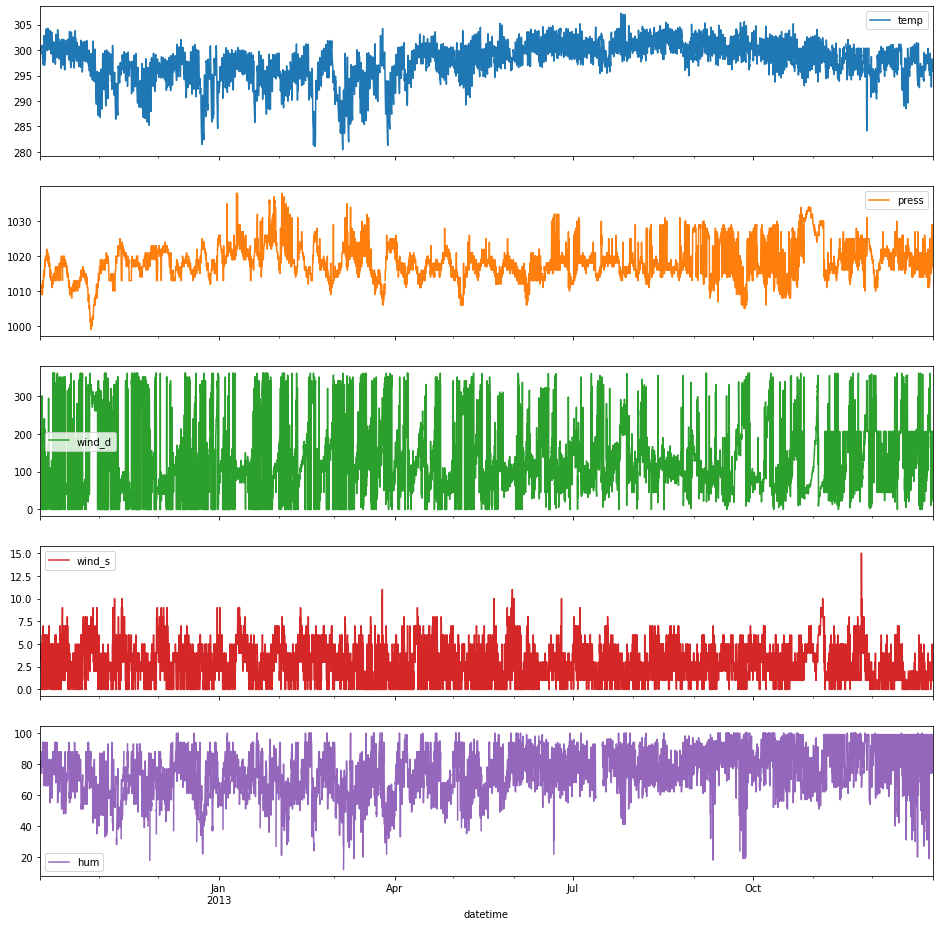

In [6]:
#Plotting all the variables
miami_data.plot(subplots = True, figsize = (16,16))

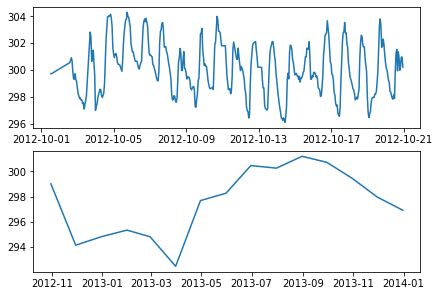

In [7]:
#Looking closer at the temperature
fix, ax = plt.subplots(2,1,constrained_layout=True)
#Looking at th first days
ax[0].plot(miami_data.temp[:'2012-10-20'])
#Looking at monthly averages
ax[1].plot(miami_data.resample('M').mean().temp)

Creating new variables to capture the daily and yearly cycles. The sine and cosine of the hour and day of the year of every observation is used, this allows to properly differentiate every time point while also preserving the information about the relative distances between all the points.

In [8]:
data_dfs = [la_data, denver_data, atlanta_data, jacksonville_data, miami_data]
for df in data_dfs:
    #The hour of every observation is extracted
    df['day'] = df.index.hour
    #The sine and cosine of the hours are obtained
    df['day_cos'] = np.cos(df.day * (2*np.pi / 24))
    df['day_sin'] = np.sin(df.day * (2*np.pi / 24))
    #The day of the year of every observation is extracted
    df['year'] = df.index.dayofyear
    #The sine and cosine of the hours are obtained
    df['year_cos'] = np.cos(df.year * (2*np.pi / 365))
    df['year_sin'] = np.sin(df.year * (2*np.pi / 365))

In [9]:
#Showing one example
miami_data

,temp,desc,press,wind_d,wind_s,hum,day,day_cos,day_sin,year,year_cos,year_sin
datetime,,,,,,,,,,,,
2012-10-01 13:00:00,299.720000,light intensity drizzle,1011.0,200,3,83.0,13,-0.965926,-0.258819,275,0.021516,-9.997685e-01
2012-10-01 14:00:00,299.732518,broken clouds,1011.0,200,3,82.0,14,-0.866025,-0.500000,275,0.021516,-9.997685e-01
2012-10-01 15:00:00,299.766579,broken clouds,1011.0,200,3,82.0,15,-0.707107,-0.707107,275,0.021516,-9.997685e-01
2012-10-01 16:00:00,299.800641,broken clouds,1011.0,200,3,82.0,16,-0.500000,-0.866025,275,0.021516,-9.997685e-01
2012-10-01 17:00:00,299.834703,broken clouds,1011.0,200,3,81.0,17,-0.258819,-0.965926,275,0.021516,-9.997685e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,297.030000,light rain,1021.0,71,3,81.0,19,0.258819,-0.965926,365,1.000000,-2.449294e-16
2013-12-31 20:00:00,297.160000,light rain,1020.0,206,1,99.0,20,0.500000,-0.866025,365,1.000000,-2.449294e-16
2013-12-31 21:00:00,296.680000,light rain,1021.0,69,1,90.0,21,0.707107,-0.707107,365,1.000000,-2.449294e-16


Dealing with null values

In [10]:
for df in data_dfs:
    print(df.isnull().sum())

temp          2
desc          0
press       259
wind_d        0
wind_s        0
hum         217
day           0
day_cos       0
day_sin       0
year          0
year_cos      0
year_sin      0
dtype: int64
temp           0
desc           0
press        451
wind_d         0
wind_s         0
hum         1672
day            0
day_cos        0
day_sin        0
year           0
year_cos       0
year_sin       0
dtype: int64
temp          5
desc          0
press        57
wind_d        0
wind_s        0
hum         356
day           0
day_cos       0
day_sin       0
year          0
year_cos      0
year_sin      0
dtype: int64
temp          0
desc          0
press        24
wind_d        3
wind_s        0
hum         397
day           0
day_cos       0
day_sin       0
year          0
year_cos      0
year_sin      0
dtype: int64
temp         12
desc          0
press        11
wind_d        0
wind_s        0
hum         254
day           0
day_cos       0
day_sin       0
year          0
year_cos

Using forward fill to fill the null values. I prefer using this method over interpolating or using backward fill when dealing with time series because these two involve leaking information from "the future"

In [11]:
for df in data_dfs:
    df.fillna(method = 'ffill', inplace = True)
    print(df.isnull().sum())

temp        0
desc        0
press       0
wind_d      0
wind_s      0
hum         0
day         0
day_cos     0
day_sin     0
year        0
year_cos    0
year_sin    0
dtype: int64
temp        0
desc        0
press       0
wind_d      0
wind_s      0
hum         0
day         0
day_cos     0
day_sin     0
year        0
year_cos    0
year_sin    0
dtype: int64
temp        0
desc        0
press       0
wind_d      0
wind_s      0
hum         0
day         0
day_cos     0
day_sin     0
year        0
year_cos    0
year_sin    0
dtype: int64
temp        0
desc        0
press       0
wind_d      0
wind_s      0
hum         0
day         0
day_cos     0
day_sin     0
year        0
year_cos    0
year_sin    0
dtype: int64
temp        0
desc        0
press       0
wind_d      0
wind_s      0
hum         0
day         0
day_cos     0
day_sin     0
year        0
year_cos    0
year_sin    0
dtype: int64


Exploring the correlation of the variables

In [12]:
for df in data_dfs:
    display(df.corr())

,temp,press,wind_d,wind_s,hum,day,day_cos,day_sin,year,year_cos,year_sin
temp,1.000000,-0.290160,0.269468,0.160267,-0.363659,0.180410,5.140652e-01,-2.348893e-01,9.101866e-02,-5.162874e-01,-2.164363e-01
press,-0.290160,1.000000,-0.146417,-0.116359,0.056502,0.048963,-5.605893e-02,-5.021044e-02,-1.194369e-01,2.347671e-01,1.023862e-01
wind_d,0.269468,-0.146417,1.000000,0.357312,-0.127424,-0.002044,2.303863e-01,-3.344231e-02,1.620875e-01,-2.137085e-01,-1.260395e-01
wind_s,0.160267,-0.116359,0.357312,1.000000,-0.239276,0.104104,2.451292e-01,-1.342365e-01,-3.710292e-02,-3.751392e-02,6.498217e-02
hum,-0.363659,0.056502,-0.127424,-0.239276,1.000000,-0.164497,-3.977003e-01,2.177912e-01,3.520949e-02,-1.752320e-01,-7.021279e-03
day,0.180410,0.048963,-0.002044,0.104104,-0.164497,1.000000,-1.016129e-01,-7.759830e-01,5.528997e-04,-1.474122e-04,-1.189432e-03
day_cos,0.514065,-0.056059,0.230386,0.245129,-0.397700,-0.101613,1.000000e+00,3.449750e-17,-3.341416e-19,-2.569891e-18,-8.030062e-19
day_sin,-0.234889,-0.050210,-0.033442,-0.134236,0.217791,-0.775983,3.449750e-17,1.000000e+00,-5.750021e-04,1.533051e-04,1.236980e-03
year,0.091019,-0.119437,0.162087,-0.037103,0.035209,0.000553,-3.341416e-19,-5.750021e-04,1.000000e+00,2.133995e-01,-7.680312e-01
year_cos,-0.516287,0.234767,-0.213709,-0.037514,-0.175232,-0.000147,-2.569891e-18,1.533051e-04,2.133995e-01,1.000000e+00,-9.782476e-02


,temp,press,wind_d,wind_s,hum,day,day_cos,day_sin,year,year_cos,year_sin
temp,1.000000,0.012735,0.049657,-0.081803,-0.349793,0.168888,2.584207e-01,-2.115765e-01,2.373283e-02,-7.110736e-01,-1.826923e-01
press,0.012735,1.000000,-0.036311,-0.100372,-0.025662,0.009232,-5.992728e-03,2.156941e-03,6.763387e-02,-8.158981e-02,-1.558393e-02
wind_d,0.049657,-0.036311,1.000000,0.362698,-0.067194,-0.084238,-7.091234e-02,1.100080e-01,-1.355786e-01,-1.102778e-01,7.879508e-02
wind_s,-0.081803,-0.100372,0.362698,1.000000,-0.175788,-0.006036,1.193948e-01,2.031632e-02,-1.096772e-01,1.497140e-01,9.790955e-02
hum,-0.349793,-0.025662,-0.067194,-0.175788,1.000000,-0.125858,-2.453614e-01,1.710632e-01,1.121908e-01,-3.895446e-02,-1.256414e-01
day,0.168888,0.009232,-0.084238,-0.006036,-0.125858,1.000000,-1.016129e-01,-7.759830e-01,5.528997e-04,-1.474122e-04,-1.189432e-03
day_cos,0.258421,-0.005993,-0.070912,0.119395,-0.245361,-0.101613,1.000000e+00,3.449750e-17,-3.341416e-19,-2.569891e-18,-8.030062e-19
day_sin,-0.211576,0.002157,0.110008,0.020316,0.171063,-0.775983,3.449750e-17,1.000000e+00,-5.750021e-04,1.533051e-04,1.236980e-03
year,0.023733,0.067634,-0.135579,-0.109677,0.112191,0.000553,-3.341416e-19,-5.750021e-04,1.000000e+00,2.133995e-01,-7.680312e-01
year_cos,-0.711074,-0.081590,-0.110278,0.149714,-0.038954,-0.000147,-2.569891e-18,1.533051e-04,2.133995e-01,1.000000e+00,-9.782476e-02


,temp,press,wind_d,wind_s,hum,day,day_cos,day_sin,year,year_cos,year_sin
temp,1.000000,-0.166228,-0.022861,-0.079449,0.052337,0.210064,2.005374e-01,-2.639807e-01,1.920482e-02,-7.278162e-01,-2.036813e-01
press,-0.166228,1.000000,-0.115545,-0.131689,-0.174243,0.023108,-4.653671e-02,-5.438340e-02,5.473548e-02,1.323050e-01,-9.568921e-02
wind_d,-0.022861,-0.115545,1.000000,0.365363,-0.177051,0.089555,5.139875e-02,-9.313057e-02,7.106241e-02,4.167388e-03,-2.107424e-02
wind_s,-0.079449,-0.131689,0.365363,1.000000,-0.233866,0.172114,2.002116e-02,-1.936306e-01,-1.351023e-01,6.050498e-02,1.738008e-01
hum,0.052337,-0.174243,-0.177051,-0.233866,1.000000,-0.275588,-2.868679e-01,3.460510e-01,1.040583e-01,-1.868576e-01,-1.874523e-01
day,0.210064,0.023108,0.089555,0.172114,-0.275588,1.000000,-1.016129e-01,-7.759830e-01,5.528997e-04,-1.474122e-04,-1.189432e-03
day_cos,0.200537,-0.046537,0.051399,0.020021,-0.286868,-0.101613,1.000000e+00,3.449750e-17,-3.341416e-19,-2.569891e-18,-8.030062e-19
day_sin,-0.263981,-0.054383,-0.093131,-0.193631,0.346051,-0.775983,3.449750e-17,1.000000e+00,-5.750021e-04,1.533051e-04,1.236980e-03
year,0.019205,0.054735,0.071062,-0.135102,0.104058,0.000553,-3.341416e-19,-5.750021e-04,1.000000e+00,2.133995e-01,-7.680312e-01
year_cos,-0.727816,0.132305,0.004167,0.060505,-0.186858,-0.000147,-2.569891e-18,1.533051e-04,2.133995e-01,1.000000e+00,-9.782476e-02


,temp,press,wind_d,wind_s,hum,day,day_cos,day_sin,year,year_cos,year_sin
temp,1.000000,-0.343769,-0.214019,-0.007460,0.087165,0.271605,1.569513e-01,-3.533675e-01,4.525699e-02,-6.426813e-01,-2.414020e-01
press,-0.343769,1.000000,-0.020727,-0.051190,-0.086597,-0.015587,-6.829867e-02,-1.239447e-02,-6.750889e-02,3.022929e-01,3.428626e-02
wind_d,-0.214019,-0.020727,1.000000,0.238888,-0.218995,0.003048,-1.121469e-01,9.782901e-03,-9.160290e-02,1.651573e-01,5.482013e-02
wind_s,-0.007460,-0.051190,0.238888,1.000000,-0.281176,0.254127,6.169878e-02,-2.925864e-01,-8.904590e-02,1.358350e-01,1.086746e-01
hum,0.087165,-0.086597,-0.218995,-0.281176,1.000000,-0.300406,-2.278405e-01,4.032260e-01,1.621487e-01,-2.180822e-01,-1.902347e-01
day,0.271605,-0.015587,0.003048,0.254127,-0.300406,1.000000,-1.016129e-01,-7.759830e-01,5.528997e-04,-1.474122e-04,-1.189432e-03
day_cos,0.156951,-0.068299,-0.112147,0.061699,-0.227840,-0.101613,1.000000e+00,3.449750e-17,-3.341416e-19,-2.569891e-18,-8.030062e-19
day_sin,-0.353367,-0.012394,0.009783,-0.292586,0.403226,-0.775983,3.449750e-17,1.000000e+00,-5.750021e-04,1.533051e-04,1.236980e-03
year,0.045257,-0.067509,-0.091603,-0.089046,0.162149,0.000553,-3.341416e-19,-5.750021e-04,1.000000e+00,2.133995e-01,-7.680312e-01
year_cos,-0.642681,0.302293,0.165157,0.135835,-0.218082,-0.000147,-2.569891e-18,1.533051e-04,2.133995e-01,1.000000e+00,-9.782476e-02


,temp,press,wind_d,wind_s,hum,day,day_cos,day_sin,year,year_cos,year_sin
temp,1.000000,-0.089551,-0.216622,0.201051,0.077369,0.286317,1.491215e-01,-3.817454e-01,1.535906e-01,-4.921793e-01,-3.187731e-01
press,-0.089551,1.000000,-0.140818,0.166650,-0.014430,-0.022672,-4.945660e-02,-1.297641e-02,-5.158809e-02,1.680740e-01,-3.823549e-02
wind_d,-0.216622,-0.140818,1.000000,-0.019391,-0.030800,0.003415,-5.858642e-02,9.155673e-03,-6.060866e-03,6.138427e-02,8.889910e-02
wind_s,0.201051,0.166650,-0.019391,1.000000,-0.202775,0.196036,7.270898e-02,-2.391836e-01,-3.653246e-02,-2.962668e-03,-8.319270e-02
hum,0.077369,-0.014430,-0.030800,-0.202775,1.000000,-0.280428,-1.839424e-01,3.825334e-01,2.158162e-01,-7.187151e-02,-2.367841e-01
day,0.286317,-0.022672,0.003415,0.196036,-0.280428,1.000000,-1.016129e-01,-7.759830e-01,5.528997e-04,-1.474122e-04,-1.189432e-03
day_cos,0.149122,-0.049457,-0.058586,0.072709,-0.183942,-0.101613,1.000000e+00,3.449750e-17,-3.341416e-19,-2.569891e-18,-8.030062e-19
day_sin,-0.381745,-0.012976,0.009156,-0.239184,0.382533,-0.775983,3.449750e-17,1.000000e+00,-5.750021e-04,1.533051e-04,1.236980e-03
year,0.153591,-0.051588,-0.006061,-0.036532,0.215816,0.000553,-3.341416e-19,-5.750021e-04,1.000000e+00,2.133995e-01,-7.680312e-01
year_cos,-0.492179,0.168074,0.061384,-0.002963,-0.071872,-0.000147,-2.569891e-18,1.533051e-04,2.133995e-01,1.000000e+00,-9.782476e-02


## Tuning and comparing different models to predict temperature

Getting the feature tables (X) and the outcome tables (Y) for all the cities

In [13]:
X_Y_data = []
for data in data_dfs:
    #getting the features
    X = data[['wind_s','wind_d','press','hum','day_cos','day_sin','year_cos','year_sin']]
    #getting the outcome
    Y = data['temp']
    X=X.values.astype('float32')
    Y=Y.values.astype('float32')
    #scaling
    scalerX=MinMaxScaler()
    scalerX.fit(X)
    X=scalerX.transform(X)
    X_Y_data.append(X)
    X_Y_data.append(Y)
X_la = X_Y_data[0]
Y_la = X_Y_data[1]
X_denver = X_Y_data[2]
Y_denver = X_Y_data[3]
X_atlanta = X_Y_data[4]
Y_atlanta = X_Y_data[5]
X_jacksonville = X_Y_data[6]
Y_jacksonville = X_Y_data[7]
X_miami = X_Y_data[8]
Y_miami = X_Y_data[9]

For the tuning and model selection, grid search of the parameters with 5 fold cross-validation is used. The scoring used is mean square error.

In [14]:
#Defining the crossvalidation method to be 5 fold with shuffle. 
#Since the data is a time series it is important to shuffle it before dividing in the folds.
cv = KFold(n_splits= 5, shuffle= True)
#Defining the scoring
scoring = 'neg_mean_squared_error'

### Random Forest

In [15]:
#Defining the grid of the parameters to be evaluated
grid = { 
    'n_estimators': [100,200,300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [ 1, 11, 21, 31, 41, 51],
}
rfr_la = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
rfr_denver = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
rfr_atlanta = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
rfr_jacksonville = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
rfr_miami = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
rfrs = [rfr_la, rfr_denver, rfr_atlanta, rfr_jacksonville, rfr_miami]

Tuning the models for each city

In [16]:
rfr_la.fit(X_la, Y_la)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [17]:
rfr_denver.fit(X_denver, Y_denver)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [18]:
rfr_atlanta.fit(X_atlanta, Y_atlanta)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [19]:
rfr_jacksonville.fit(X_jacksonville, Y_jacksonville)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [20]:
rfr_miami.fit(X_miami, Y_miami)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [22]:
for rf in rfrs:
    print(rf.best_score_)

-1.9002470856692344
-4.728054504395265
-2.710168357498201
-2.65640088554375
-1.1002294976357616


### XGBoost

In [23]:
#Defining the estimator
#Defining the grid of the parameters to be evaluated
grid = { 
    'n_estimators': [10,20,30,40,50,100],
    'max_depth' : [ 1, 11, 21, 31, 41],
}
xgb_la = GridSearchCV(estimator=XGBRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
xgb_denver = GridSearchCV(estimator=XGBRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
xgb_atlanta = GridSearchCV(estimator=XGBRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
xgb_jacksonville = GridSearchCV(estimator=XGBRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
xgb_miami = GridSearchCV(estimator=XGBRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
xgbs = [xgb_la, xgb_denver, xgb_atlanta, xgb_jacksonville, xgb_miami]

In [24]:
xgb_la.fit(X_la, Y_la)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weig...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg

In [25]:
xgb_denver.fit(X_denver, Y_denver)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weig...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg

In [26]:
xgb_atlanta.fit(X_atlanta, Y_atlanta)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weig...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg

In [27]:
xgb_jacksonville.fit(X_jacksonville, Y_jacksonville)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weig...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg

In [28]:
xgb_miami.fit(X_miami, Y_miami)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weig...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg

In [29]:
for xgb in xgbs:
    print(xgb.best_score_)

-1.4677944421768188
-3.961008882522583
-2.156252956390381
-2.1459560871124266
-0.9892239809036255


### KNN

In [30]:
#Defining the grid of parameter to be evaluated
grid = { 
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'weights': ['uniform','distance']
}
knnr_la = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnr_denver = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnr_atlanta = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnr_jacksonville = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnr_miami = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnrs = [knnr_la, knnr_denver, knnr_atlanta, knnr_jacksonville, knnr_miami]

Evaluating the models

In [31]:
knnr_la.fit(X_la, Y_la)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [32]:
knnr_denver.fit(X_denver, Y_denver)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [33]:
knnr_atlanta.fit(X_atlanta, Y_atlanta)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [34]:
knnr_jacksonville.fit(X_jacksonville, Y_jacksonville)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [35]:
knnr_miami.fit(X_miami, Y_miami)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [36]:
for knn in knnrs:
    print(knn.best_score_)

-5.209017449256214
-15.946566727795087
-8.552187615553091
-6.429212634501883
-2.251929107980685


In [37]:
#Creating a data frame with the best scores
#Extracting the scores
rfs_best_scores = []
for rf in rfrs:
    rfs_best_scores.append(rf.best_score_)
xgbs_best_scores = []
for xgb in xgbs:
    xgbs_best_scores.append(xgb.best_score_)
knn_best_scores = []
for knn in knnrs:
    knn_best_scores.append(knn.best_score_)
#Creating the table
scores_df = pd.DataFrame({'city': ['la','denver','atlanta','jachsonville','miami'],
                          'rf':rfs_best_scores,
                          'xgb': xgbs_best_scores,
                          'knn': knn_best_scores})

In [38]:
scores_df

,city,rf,xgb,knn
0,la,-1.900247,-1.467794,-5.209017
1,denver,-4.728055,-3.961009,-15.946567
2,atlanta,-2.710168,-2.156253,-8.552188
3,jachsonville,-2.656401,-2.145956,-6.429213
4,miami,-1.100229,-0.989224,-2.251929


XGBoost seems to have the best performance for all cities

## Tuning and comparing different models to predict the weather conditions

Exploring the classes in each city

In [39]:
la_data.desc.value_counts()

sky is clear                   6796
overcast clouds                 689
haze                            675
mist                            639
broken clouds                   590
scattered clouds                529
light rain                      414
few clouds                      354
fog                             183
moderate rain                    46
light intensity drizzle          15
heavy intensity rain             15
smoke                             4
thunderstorm                      2
thunderstorm with rain            1
drizzle                           1
shower rain                       1
light intensity shower rain       1
Name: desc, dtype: int64

In [40]:
denver_data.desc.value_counts()

sky is clear                    3408
scattered clouds                2546
broken clouds                   1579
few clouds                      1072
overcast clouds                  714
light rain                       468
mist                             449
moderate rain                    175
fog                               98
light snow                        96
heavy snow                        70
thunderstorm                      68
haze                              64
heavy intensity rain              34
very heavy rain                   24
snow                              21
thunderstorm with light rain      16
proximity shower rain             11
proximity thunderstorm            10
thunderstorm with rain            10
light intensity drizzle            5
squalls                            4
drizzle                            3
smoke                              3
thunderstorm with heavy rain       3
dust                               3
light intensity shower rain        1
N

In [41]:
atlanta_data.desc.value_counts()

sky is clear                        4763
overcast clouds                     1338
mist                                1059
broken clouds                        895
light rain                           800
scattered clouds                     718
few clouds                           427
moderate rain                        316
light intensity drizzle              164
fog                                  154
heavy intensity rain                  77
proximity thunderstorm                72
drizzle                               55
thunderstorm                          27
haze                                  25
heavy snow                            21
thunderstorm with light rain          11
thunderstorm with rain                 6
light intensity shower rain            5
heavy intensity drizzle                5
proximity thunderstorm with rain       5
thunderstorm with heavy rain           5
light snow                             3
squalls                                2
thunderstorm wit

In [42]:
jacksonville_data.desc.value_counts()

sky is clear                    2834
broken clouds                   1530
overcast clouds                 1482
mist                            1428
scattered clouds                1197
few clouds                       891
light rain                       740
moderate rain                    266
fog                              221
proximity thunderstorm           104
thunderstorm                      89
heavy intensity rain              71
haze                              41
thunderstorm with light rain      17
proximity shower rain             15
light intensity drizzle            9
smoke                              9
thunderstorm with heavy rain       7
thunderstorm with rain             4
Name: desc, dtype: int64

In [43]:
miami_data.desc.value_counts()

broken clouds                   2284
light rain                      2093
sky is clear                    1851
scattered clouds                1593
few clouds                      1050
overcast clouds                  906
mist                             472
moderate rain                    248
light intensity drizzle          107
heavy intensity rain              76
proximity thunderstorm            74
fog                               48
thunderstorm                      48
thunderstorm with light rain      38
haze                              34
thunderstorm with rain            16
thunderstorm with heavy rain      13
smoke                              2
squalls                            1
very heavy rain                    1
Name: desc, dtype: int64

Heavy class imbalance can be seen in all cities being some weather descriptions much more frequent than others.

Using factorize to encode the classes as integers in each city

In [44]:
factors_values = []
for df in data_dfs:
    #creating the encoded column
    df['desc_factor'],fac_val = pd.factorize(df.desc)
    #storing the labels for each city
    factors_values.append(fac_val)

In [45]:
miami_data

,temp,desc,press,wind_d,wind_s,hum,day,day_cos,day_sin,year,year_cos,year_sin,desc_factor
datetime,,,,,,,,,,,,,
2012-10-01 13:00:00,299.720000,light intensity drizzle,1011.0,200,3,83.0,13,-0.965926,-0.258819,275,0.021516,-9.997685e-01,0
2012-10-01 14:00:00,299.732518,broken clouds,1011.0,200,3,82.0,14,-0.866025,-0.500000,275,0.021516,-9.997685e-01,1
2012-10-01 15:00:00,299.766579,broken clouds,1011.0,200,3,82.0,15,-0.707107,-0.707107,275,0.021516,-9.997685e-01,1
2012-10-01 16:00:00,299.800641,broken clouds,1011.0,200,3,82.0,16,-0.500000,-0.866025,275,0.021516,-9.997685e-01,1
2012-10-01 17:00:00,299.834703,broken clouds,1011.0,200,3,81.0,17,-0.258819,-0.965926,275,0.021516,-9.997685e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,297.030000,light rain,1021.0,71,3,81.0,19,0.258819,-0.965926,365,1.000000,-2.449294e-16,4
2013-12-31 20:00:00,297.160000,light rain,1020.0,206,1,99.0,20,0.500000,-0.866025,365,1.000000,-2.449294e-16,4
2013-12-31 21:00:00,296.680000,light rain,1021.0,69,1,90.0,21,0.707107,-0.707107,365,1.000000,-2.449294e-16,4


Getting the targets (Y) for all the cities

In [46]:
Y_list = []
for df in data_dfs:
    #getting the outcome
    Y = df.desc_factor
    Y=Y.values.astype('float32')
    Y_list.append(Y)
Y_la = Y_list[0]
Y_denver = Y_list[1]
Y_atlanta = Y_list[2]
Y_jacksonville = Y_list[3]
Y_miami = Y_list[4]

For the tuning and model selection grid search of the parameters with 5 fold cross-validation is used. The scoring used is accuracy.

In [47]:
#Defining the crossvalidation method to be 5 fold with shuffle. 
#Since the data is a time series it is important to shuffle it before dividing in the folds.
cv = KFold(n_splits= 5, shuffle= True)
#Defining the scoring
scoring = 'accuracy'

## Random Forest

In [48]:
#Defining the grid
grid = { 
    'n_estimators': [100,200,300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [ 1, 11, 21, 31, 41, 51],
}
#Defining the estimator with balanced class weights
estimator = RandomForestClassifier(class_weight = 'balanced')
rfc_la = GridSearchCV(estimator=estimator, param_grid=grid, cv= cv, scoring = scoring,n_jobs = -1)
rfc_denver = GridSearchCV(estimator=estimator, param_grid=grid, cv= cv, scoring = scoring,n_jobs = -1)
rfc_atlanta = GridSearchCV(estimator=estimator, param_grid=grid, cv= cv, scoring = scoring,n_jobs = -1)
rfc_jacksonville = GridSearchCV(estimator=estimator, param_grid=grid, cv= cv, scoring = scoring,n_jobs = -1)
rfc_miami = GridSearchCV(estimator=estimator, param_grid=grid, cv= cv, scoring = scoring,n_jobs = -1)
rfcs = [rfc_la, rfc_denver, rfc_atlanta, rfc_jacksonville, rfc_miami]

In [49]:
rfc_la.fit(X_la, Y_la)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [50]:
rfc_denver.fit(X_denver, Y_denver)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [51]:
rfc_atlanta.fit(X_atlanta, Y_atlanta)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [52]:
rfc_jacksonville.fit(X_jacksonville, Y_jacksonville)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [53]:
rfc_miami.fit(X_miami, Y_miami)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [55]:
for rf in rfcs:
    print(rf.best_score_)

0.7264262893655864
0.6781378366042903
0.6264719306252853
0.5784573254221816
0.5602008215426746


## KNN

In [56]:
grid = { 
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'weights': ['uniform','distance']
}

knnc_la = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnc_denver = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnc_atlanta = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnc_jacksonville = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knnc_miami = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= cv, scoring= scoring,n_jobs=-1)
knncs = [knnc_la, knnc_denver, knnc_atlanta, knnc_jacksonville, knnc_miami]

In [57]:
knnc_la.fit(X_la, Y_la)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [58]:
knnc_denver.fit(X_denver, Y_denver)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [59]:
knnc_atlanta.fit(X_atlanta, Y_atlanta)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [60]:
knnc_jacksonville.fit(X_jacksonville, Y_jacksonville)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [61]:
knnc_miami.fit(X_miami, Y_miami)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [62]:
for knn in knncs:
    print(knn.best_score_)

0.6514833409402099
0.5044272021907805
0.5187585577361935
0.420629849383843
0.41077133728890913


In [63]:
#Creating a data frame with the best scores
#Extracting the scores
rfs_best_scores = []
for rf in rfcs:
    rfs_best_scores.append(rf.best_score_)
knn_best_scores = []
for knn in knncs:
    knn_best_scores.append(knn.best_score_)
#Creating the table
scores_df = pd.DataFrame({'city': ['la','denver','atlanta','jachsonville','miami'],
                          'rf':rfs_best_scores,
                          'knn': knn_best_scores})

In [64]:
scores_df

,city,rf,knn
0,la,0.726426,0.651483
1,denver,0.678138,0.504427
2,atlanta,0.626472,0.518759
3,jachsonville,0.578457,0.420630
4,miami,0.560201,0.410771


Random Forest appears to have better performance for all the cities

## Doing the predictions

Preparing the data to do the predictions

In [65]:
test = jul_test.transpose()
#Setting the column names with the reading types
test.columns = test.iloc[5]
#Removing the row with the reading types
test = test.iloc[0:5]
#Creating the day, year columns with the sine and cosine columns
test['day'] = jul_test.index.hour[0]
test['year'] = jul_test.index.dayofyear[0]
test['day_cos'] = np.cos(test.day * (2*np.pi / 24))
test['day_sin'] = np.sin(test.day * (2*np.pi / 24))
test['year_cos'] = np.cos(test.year * (2*np.pi / 365))
test['year_sin'] = np.sin(test.year * (2*np.pi / 365))
test = test[['wind speed', 'wind direction', 'humidity', 'pressure', 'day_cos', 'day_sin', 'year_cos', 'year_sin']]
test

Reading,wind speed,wind direction,humidity,pressure,day_cos,day_sin,year_cos,year_sin
Los Angeles,0,45,100,1014,-0.965926,-0.258819,-0.999074,-0.043022
Denver,1,233,56,1059,-0.965926,-0.258819,-0.999074,-0.043022
Atlanta,1,0,72,1020,-0.965926,-0.258819,-0.999074,-0.043022
Jacksonville,2,240,78,1020,-0.965926,-0.258819,-0.999074,-0.043022
Miami,2,140,70,1021,-0.965926,-0.258819,-0.999074,-0.043022


In [66]:
#Scaling the variables
test_scaled = scalerX.transform(test)
test_scaled

/Users/jeronimopissinis/miniforge3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[ 0.00000000e+00,  1.25000003e-01, -2.30512825e+01,
         1.13863640e+01,  1.70370869e-02,  3.70590477e-01,
         4.44443761e-04,  4.78488683e-01],
       [ 6.66666701e-02,  6.47222238e-01, -2.41794876e+01,
         1.18977276e+01,  1.70370869e-02,  3.70590477e-01,
         4.44443761e-04,  4.78488683e-01],
       [ 6.66666701e-02,  0.00000000e+00, -2.37692312e+01,
         1.14545458e+01,  1.70370869e-02,  3.70590477e-01,
         4.44443761e-04,  4.78488683e-01],
       [ 1.33333340e-01,  6.66666683e-01, -2.36153850e+01,
         1.14545458e+01,  1.70370869e-02,  3.70590477e-01,
         4.44443761e-04,  4.78488683e-01],
       [ 1.33333340e-01,  3.88888898e-01, -2.38205132e+01,
         1.14659094e+01,  1.70370869e-02,  3.70590477e-01,
         4.44443761e-04,  4.78488683e-01]])

In [71]:
#Doing the predictions using the XGBoost regressors
Y_pr = []
for i in range(len(xgbs)):
    #Extracting the prediction made by the model of the corresponding city
    Y_pr.append(xgbs[i].predict(test_scaled)[i])

In [72]:
Y_pr

[290.13498, 281.56668, 294.20508, 299.0316, 297.77148]

In [76]:
#Doing the predictions using the Random Forest Classifier
Y_pc = []
for i in range(len(rfcs)):
    #Extracting the prediction made by the model of the corresponding city
    prediction = rfcs[i].predict(test_scaled)[i]
    #Using the correspnding labels for the city to get the prediction
    prediction = factors_values[i][int(prediction)]
    Y_pc.append(prediction)

In [77]:
Y_pc

['sky is clear', 'sky is clear', 'mist', 'mist', 'few clouds']

In [78]:
#Creating a data frame with the predictions for each city
predictions = pd.DataFrame({
    'city' : test.index,
    'temperature' : Y_pr,
    'weather description' : Y_pc
})

In [79]:
predictions

,city,temperature,weather description
0,Los Angeles,290.134979,sky is clear
1,Denver,281.566681,sky is clear
2,Atlanta,294.205078,mist
3,Jacksonville,299.031586,mist
4,Miami,297.771484,few clouds


In [80]:
#Saving the predictions in a txt file
predictions.to_csv('predictions.txt', header=None, index=None, sep=' ', mode='a')